In [1]:
# Note: inline iFrame exercise preview does not work in Chrome or Safari, please use Firefox, probably because of "Prevent cross-site tracking" enabled by default.
from Exercise import Exercise, MarkdownBlock
from config import URL, TOKEN
import json

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})

from sklearn.datasets import load_digits

Exercise.URL = URL
Exercise.TOKEN = TOKEN

In [2]:
from sympy import Rational, Symbol, latex, UnevaluatedExpr

u = lambda x : UnevaluatedExpr(x)

# Helper functions
def explain_add(a, b):
    assert(np.shape(a) == np.shape(b))
    rows, columns = np.shape(a)
    return sp.Matrix([[Symbol(f"({latex(u(a[i,j]))} + {latex(u(b[i,j]))})") for j in range(columns)] for i in range(rows)])

def symbolic_matrix(character, rows, columns):
    return sp.Matrix([[Symbol(f"{{{character}}}_{{{i+1}, {j+1}}}") for j in range(columns)] for i in range(rows)])

### Integer addition

In [3]:
e = Exercise("What is $1 + 1$?")
e.add_answer(2, True, "That's right!")
e.add_answer(0, False, "No, that's not right. Did you compute $1-1=0$ instead?")
e.add_default_feedback("No, that's not right!")
# e.play()
e.write()

# Show symbolic equivalence!


### Parameterized integer addition

In [ ]:
m = "What is $@a + @b$?"

a = np.random.randint(0, 10)
b = np.random.randint(0, 10)

params = {}
params["a"] = a  
params["b"] = b

e = Exercise(MarkdownBlock(m, params))

e.add_answer(a + b, True, "That's right!")
e.display()
e.write()
e.publish()


### Vector addition

In [41]:
m = "What is $@a + @b$?"

a = sp.Matrix(np.arange(4))
b = sp.Matrix(np.flip(np.arange(4)))

params = {}
params["a"] = a 
params["b"] = b

e = Exercise(MarkdownBlock(m, params))

e.add_answer(a + b, True, "That's right!")

params = {}
params["x"] = symbolic_matrix("a", 4,1)
params["y"] = symbolic_matrix("b", 4,1)
params["z"] = explain_add(params["x"], params["y"])
default_feedback = """Remember the definition of matrix addition:

$@x + @y = @z$"""
e.add_default_feedback(MarkdownBlock(default_feedback, params))

e.display()
e.write()
e.publish()


Published succesfully, preview at: https://www.mscthesis.nl/preview?id=dc49b6f8-0857-4c66-a3df-19874350c7b3


### Parameterized (both matrix dimensions and values) 

In [47]:
s = "What is $@a \cdot @b$"

rows = np.random.randint(1, 6)
columns = np.random.randint(1, 6)

params = {}
params["a"] = sp.Matrix(np.random.randint(5, size=rows*columns).reshape((rows,columns)))
params["b"] = sp.Matrix(np.random.randint(5, size=(2+rows)*columns).reshape((columns,rows+2)))

e = Exercise(MarkdownBlock(s, params))

ans = params["a"] * params["b"]
display(ans)
e.add_answer(params["a"] * params["b"], True, "That's right!")
e.add_default_feedback("Nope, that's not right!")
e.display()
e.write()
e.publish()

Matrix([[38, 8, 28]])

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=7cfc5b87-30bc-43f1-a400-925055d8fcd4


### Matrix visualization, contextualized exercise (MNIST dataset, hand-written digit recognition problem)

In [45]:
# Helper functions

digits = load_digits()
sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

# Plot and save matrix image
def save_image_for(matrix, filename):
    fig, ax = plt.subplots()
    
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels([i for i in range(0, 9)])

    ax.yaxis.set_label_position('left') 
    ax.set_yticklabels([i for i in range(0, 9)])

    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.matshow(matrix, cmap='binary')
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')

# Return binary representation of image matrix
def to_binary(m):
    return np.where(m > 7, 1, 0)

<ipython-input-45-de1d524c2286>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-45-de1d524c2286>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])



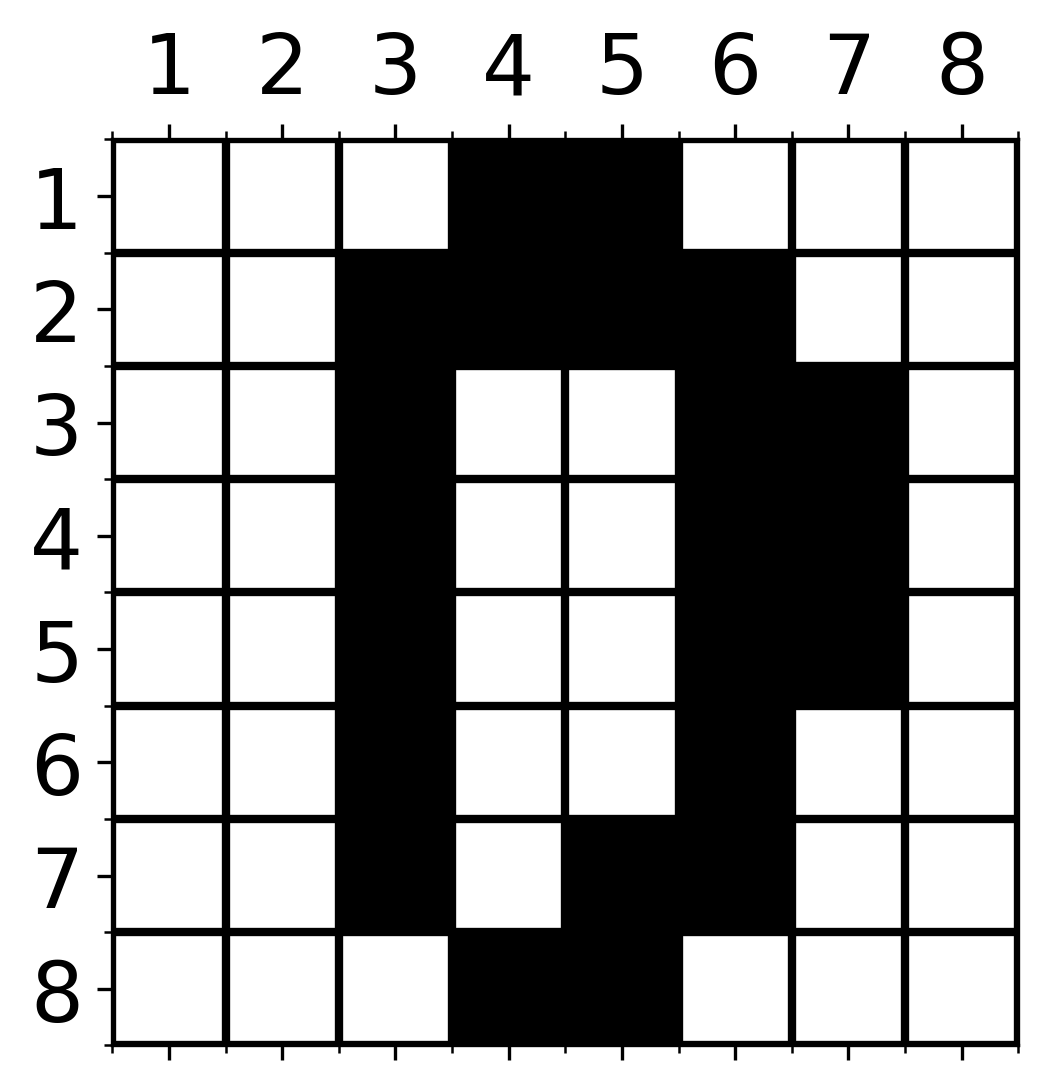
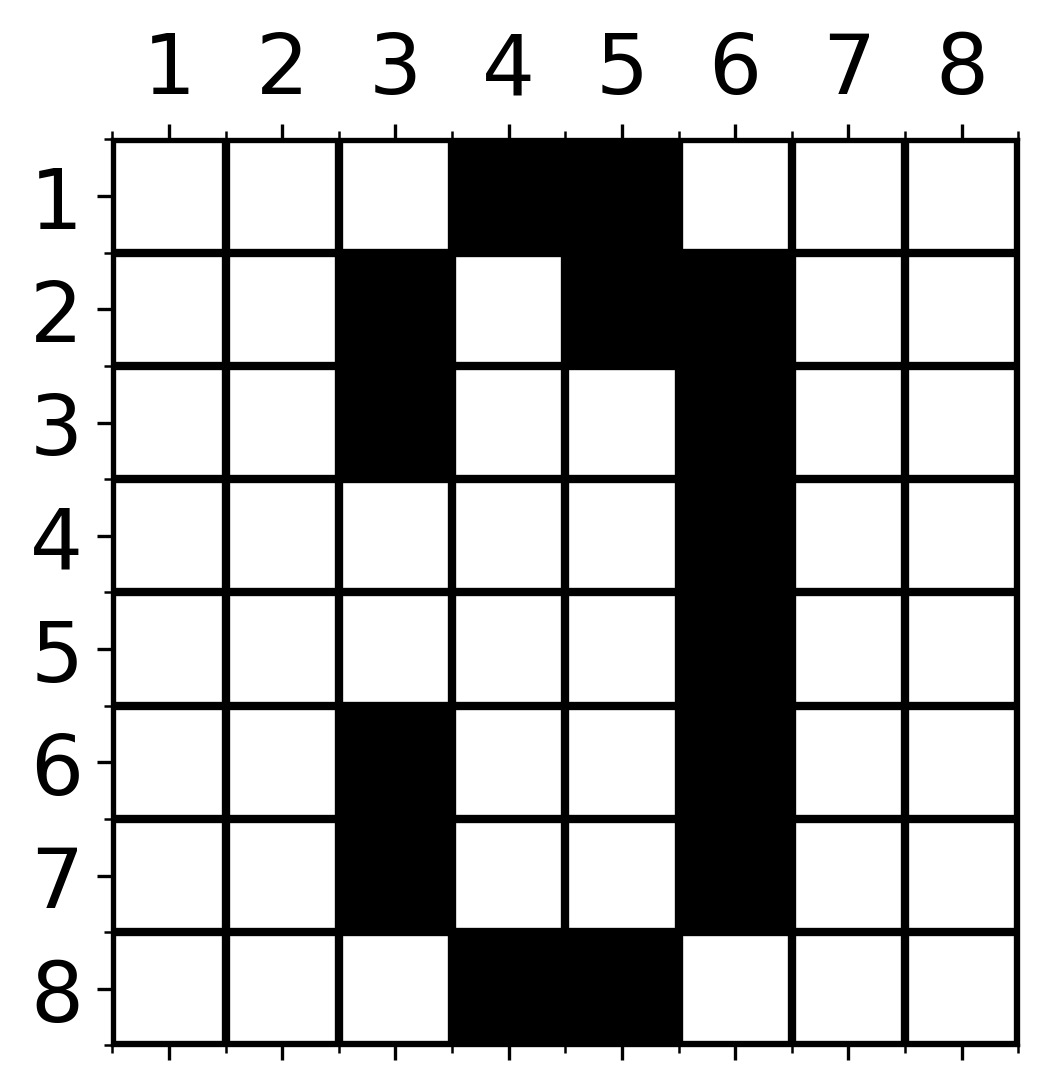
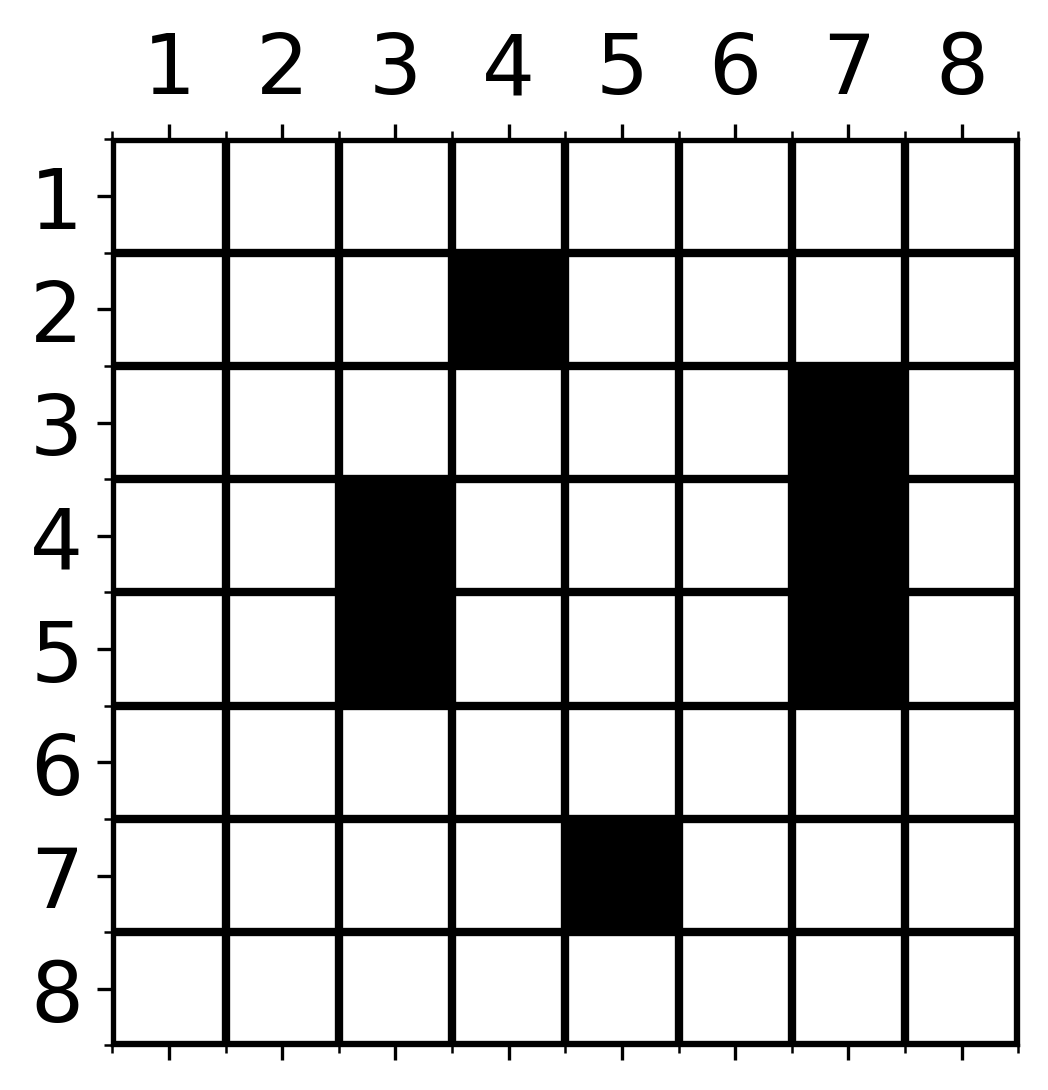

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=e9c641e9-601f-4e20-b46f-bd72dd9b2aea


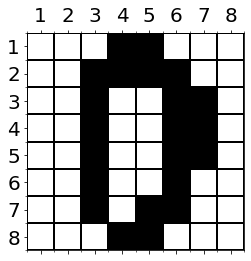

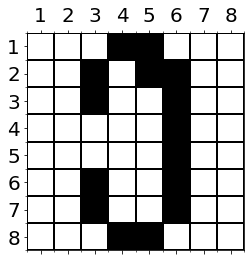

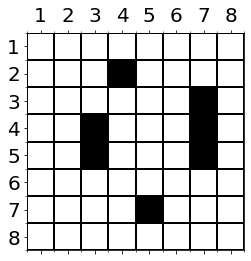

In [46]:
t = r"""
<div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    $A = $<img src="zero_1.png" width="150"/>
    $B = $<img src="zero_2.png" width="150"/>
    $D = $<img src="diff.png" width="150"/>
</div>

$A = @z1, B = @z2, D = |A - B| = @d, \sum D = @s$
"""

# TODO: illustrate non-binary case
zero_1 = nums[0]
zero_1 = to_binary(zero_1)

zero_2 = nums[2]
zero_2 = to_binary(zero_2)

save_image_for(zero_1, "zero_1")
save_image_for(zero_2, "zero_2")
save_image_for(np.abs(zero_1 - zero_2), "diff")

z1 = sp.Matrix(zero_1)
z2 = sp.Matrix(zero_2)
params = {}
params["z1"] = z1
params["z2"] = z2

distance_matrix = np.abs(z1 - z2)
d = sp.Matrix(distance_matrix)
params["d"] = d
params["s"] = np.sum(distance_matrix)

e = Exercise(MarkdownBlock(t, params))
e.display()
e.write()
e.publish()